In [86]:
# Etapa 1 - Importar bibliotecas
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
# Etapa 2 - Carregar dados
df = pd.read_csv("clientes_seguradora.csv")
df.head()

,ID,Idade,Genero,Estado_Civil,Rendimento_Anual,Numero_Polices,Valor_Total_Seguro,Score_Satisfacao,Tipo_Cliente
0,1,61,Masculino,Casado,81136.70,5,254896.72,77,Premium
1,2,63,Masculino,Divorciado,80725.74,6,496883.19,32,Economy
2,3,40,Feminino,Divorciado,33388.87,6,564330.50,73,Standard
3,4,39,Masculino,Casado,111125.61,2,59020.13,74,Standard
4,5,57,Feminino,Casado,46264.44,1,587349.44,57,Standard


In [88]:
# Etapa 3 - Separar features e alvo
X = df.drop(["ID", "Tipo_Cliente"], axis=1)
y = df["Tipo_Cliente"]

In [89]:
# Etapa 4 - Definir colunas categóricas e numéricas
categorical_cols = ["Genero", "Estado_Civil"]
numerical_cols = ["Idade", "Rendimento_Anual", "Numero_Polices", "Valor_Total_Seguro", "Score_Satisfacao"]

In [90]:
# Etapa 5 - Criar pré-processador com ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ("num", StandardScaler(), numerical_cols),
    ("cat", OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

In [91]:
# Etapa 6 - Pipeline completo
pipeline = Pipeline(steps=[
    ("preprocessamento", preprocessor),
    ("knn", KNeighborsClassifier(n_neighbors=5))
])

In [92]:
# Etapa 7 - Separar treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [93]:
# Etapa 8 - Treinar modelo
pipeline.fit(X_train, y_train)

# Previsões
y_pred = pipeline.predict(X_test)


In [94]:
# Etapa 9 - Avaliação do modelo
print("Relatório de Classificação:\n")
print(classification_report(y_test, y_pred, zero_division=0))

acuracia = accuracy_score(y_test, y_pred)
print(f"Acurácia no conjunto de teste: {acuracia:.2f}")

Relatório de Classificação:

              precision    recall  f1-score   support

    Affluent       0.82      0.69      0.75       192
     Economy       0.94      0.89      0.91      6095
     Premium       0.86      0.82      0.84      1481
    Standard       0.87      0.92      0.89      6232

    accuracy                           0.89     14000
   macro avg       0.87      0.83      0.85     14000
weighted avg       0.89      0.89      0.89     14000

Acurácia no conjunto de teste: 0.89


In [99]:
# Etapa 10 - Validação cruzada com 5 folds
scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')

print("Acurácias por fold:")
print(scores)
print(f"\nAcurácia média: {scores.mean():.2f}")
print(f"Desvio padrão: {scores.std():.2f}")

Acurácias por fold:
[0.893      0.89314286 0.8935     0.8965     0.89842857]

Acurácia média: 0.89
Desvio padrão: 0.00


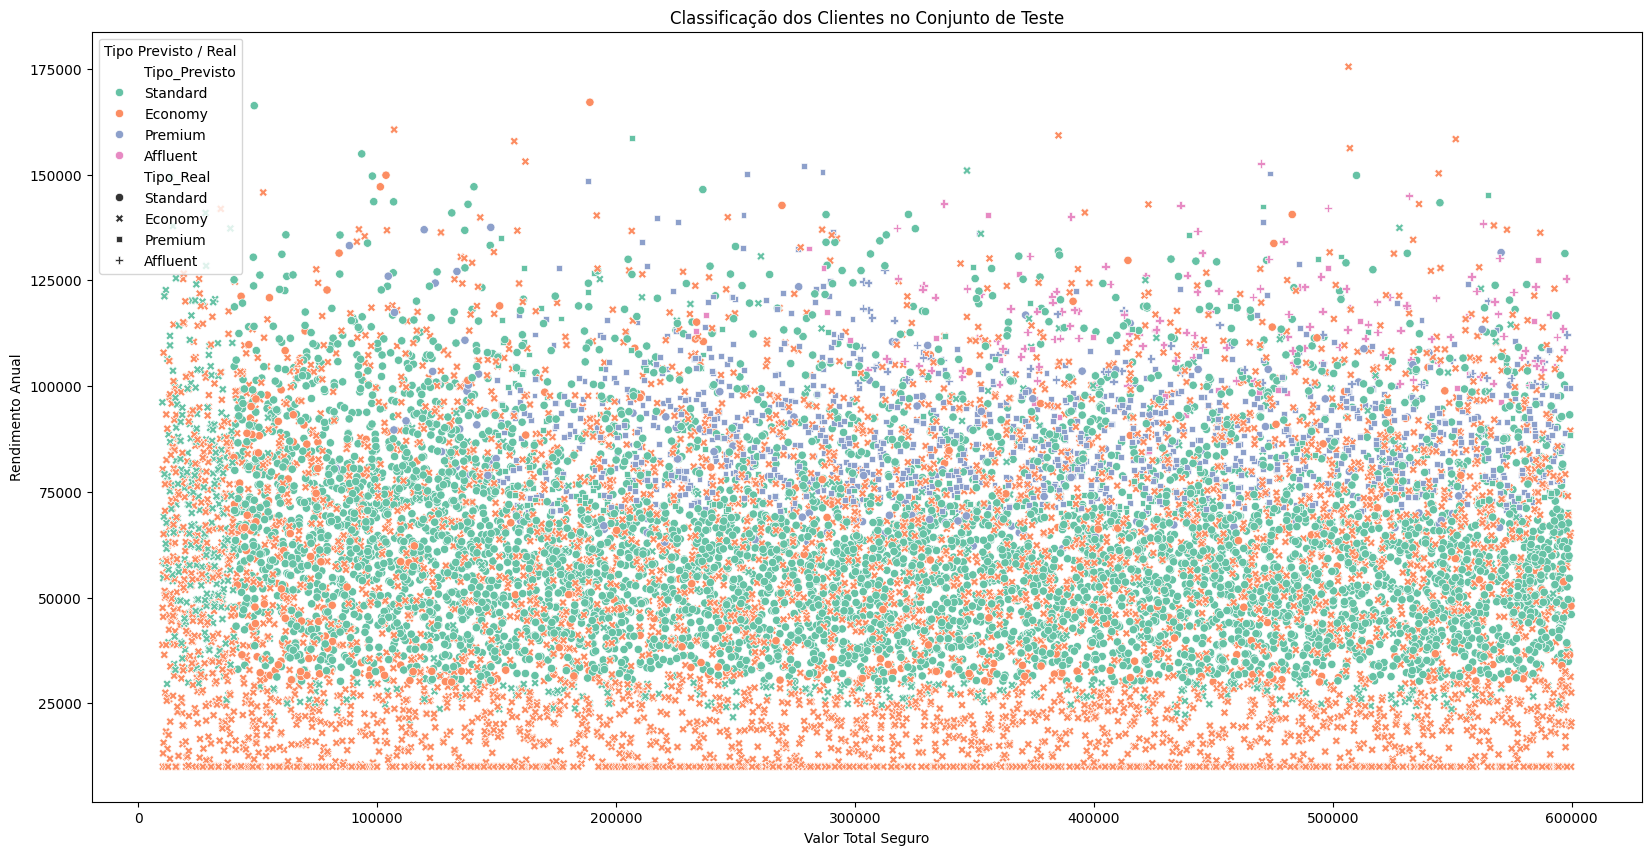

In [103]:
# Etapa 11 - Gráfico com clientes do conjunto de teste
X_test_plot = X_test.copy()
X_test_plot["Tipo_Real"] = y_test.values
X_test_plot["Tipo_Previsto"] = y_pred

plt.figure(figsize=(20, 10))
sns.scatterplot(
    data=X_test_plot,
    x="Valor_Total_Seguro",
    y="Rendimento_Anual",
    hue="Tipo_Previsto",
    style="Tipo_Real",
    palette="Set2"
)
plt.title("Classificação dos Clientes no Conjunto de Teste")
plt.xlabel("Valor Total Seguro")
plt.ylabel("Rendimento Anual")
plt.legend(title="Tipo Previsto / Real")
plt.show()

In [97]:
# Etapa 12 - Novo cliente(s) hipotético(s)
novos_clientes = pd.read_csv("clientes_seguradora_novo.csv")

# Prever o tipo de cliente
tipos_previstos_novos = pipeline.predict(novos_clientes)
novos_clientes["Tipo_Previsto"] = tipos_previstos_novos

# Mostrar tabela
print("Classificação dos novos clientes:")
display(novos_clientes.head())

Classificação dos novos clientes:


,ID,Idade,Genero,Estado_Civil,Rendimento_Anual,Numero_Polices,Valor_Total_Seguro,Score_Satisfacao,Tipo_Cliente,Tipo_Previsto
0,1,49,Masculino,Solteiro,17916.12,5,356383.20,83,Economy,Economy
1,2,30,Masculino,Casado,89006.50,4,565695.00,71,Premium,Standard
2,3,21,Masculino,Solteiro,110712.10,2,218775.43,32,Economy,Economy
3,4,30,Feminino,Solteiro,57020.46,5,232303.72,53,Standard,Standard
4,5,31,Feminino,Casado,37567.92,4,391674.32,70,Standard,Standard


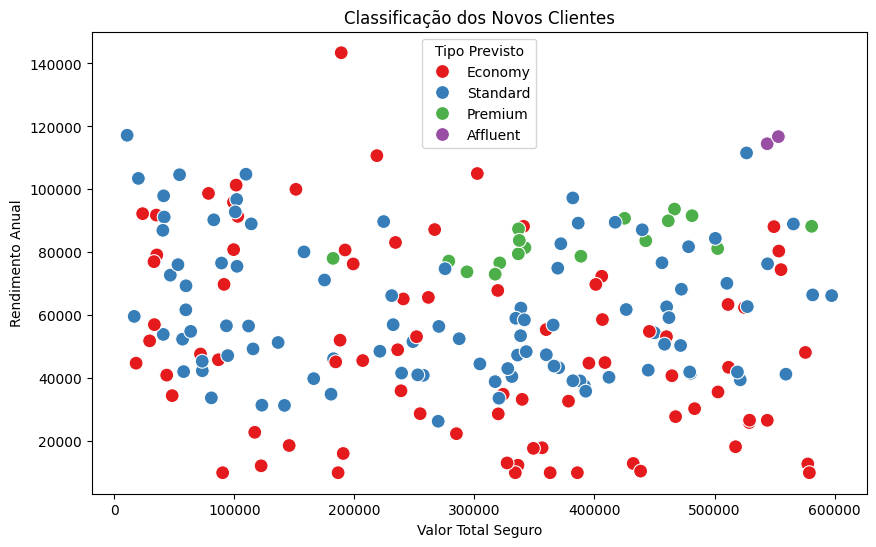

In [98]:
# Etapa 13 - Gráfico dos novos clientes
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=novos_clientes,
    x="Valor_Total_Seguro",
    y="Rendimento_Anual",
    hue="Tipo_Previsto",
    palette="Set1",
    s=100
)
plt.title("Classificação dos Novos Clientes")
plt.xlabel("Valor Total Seguro")
plt.ylabel("Rendimento Anual")
plt.legend(title="Tipo Previsto")
plt.show()